In [54]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from IPython.display import display
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import face_recognition
import cv2

IMAGESIZE = [300, 300]  # width (0) Height (1) 

In [55]:
# usage print(get_face_locations('nm0000001_rm946909184_1899-5-10_1968.jpg'))

def get_face_locations(imagePath): 
    image = face_recognition.load_image_file(imagePath)
    return face_recognition.face_locations(image)

# crop the image to just read the face location  
def crop_image(image, face_loc):
    return image[face_loc[1]:face_loc[3], face_loc[0]:face_loc[2]]  #  1 , 3, 0, 2

# resize the image to match the 
def resize_image(image):
    dsize = (IMAGESIZE[0], IMAGESIZE[1]) # width (0) Height (1) 
    return cv2.resize(image, dsize)

In [58]:
# load up the meta data Image paths 
imdb_jsonFile = json.load(open("imdb_outputdata.json"))
wiki_jsonFile = json.load(open("wiki_outputdata.json"))
imdbLen = len(imdb_jsonFile)
wikiLen = len(wiki_jsonFile)

In [59]:
type(imdb_jsonFile)

list

['1.0', '69', [1072, 161, 1214, 303], '01/nm0000001_rm124825600_1899-5-10_1968.jpg']
01/nm0000001_rm124825600_1899-5-10_1968.jpg
(200, 200, 3)


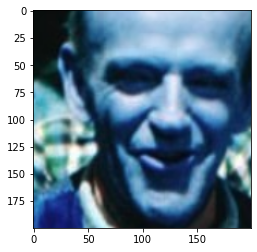

['1.0', '71', [477, 100, 622, 245], '01/nm0000001_rm3343756032_1899-5-10_1970.jpg']
01/nm0000001_rm3343756032_1899-5-10_1970.jpg
(200, 200, 3)


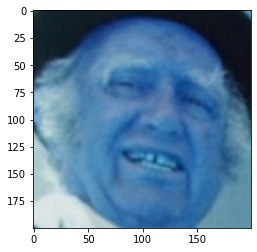

['1.0', '69', [114, 114, 451, 451], '01/nm0000001_rm577153792_1899-5-10_1968.jpg']
01/nm0000001_rm577153792_1899-5-10_1968.jpg
(200, 200, 3)


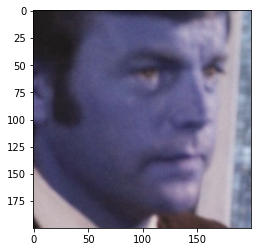

['1.0', '69', [622, 424, 844, 645], '01/nm0000001_rm946909184_1899-5-10_1968.jpg']
01/nm0000001_rm946909184_1899-5-10_1968.jpg
(200, 200, 3)


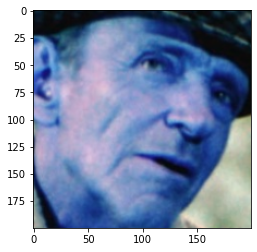

In [61]:
#type(imdb_jsonFile)
counter = 0 
corrupted_images = 0 

for x in imdb_jsonFile:
    if counter < 4:
        print(x)
        print(x[3])
        image = cv2.imread(x[3])
        
        # if the image is one of the corrupted image, skip this entry
        if(image.shape == (47,100,3) or image.shape == (1,1,3)):
            corrupted_images +=1 
            continue
        
        face_loc = x[2]
        cropped_image = crop_image(image, face_loc)
        resized_image = resize_image(cropped_image)
        print(resized_image.shape)
        plt.imshow(resized_image) 
        plt.show()
    counter+=1


In [71]:
# function to  fetch the IMAGES from X(start) to Y(end) and returns three arrays  
def read_images_gender_Age(start, end, JSON_File):
    X=[]
    Y=[]
    Z=[]
    for x in range(start, end+1):
        try:
            image = cv2.imread(JSON_File[x][3])
                # if the image is one of the corrupted image, skip this entry
            if(image.shape == (47,100,3) or image.shape == (1,1,3)):
                corrupted_images +=1 
                continue

            face_loc = JSON_File[x][2]
            cropped_image = crop_image(image, face_loc)
            resized_image = resize_image(cropped_image)
            X.append(resized_image)
            Y.append(JSON_File[x][0]) # gender 
            Z.append(JSON_File[x][1]) # age
            #print(resized_image.shape)
            #plt.imshow(resized_image) 
            #plt.show()
        except Exception as e:
            print('ran into exception, skipping this entry, Error:', e)
            continue
    return X,Y,Z


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(2, 2),
 activation='relu',
 input_shape=[X.shape[1],
 X.shape[2],
 X.shape[3]]))
model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

batch_size = 20
epochs = 1
validation_split = 0.2
#history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1, 0.2)

In [ ]:
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# need a function that will
# store a training session history into a file inside the training history folder

In [10]:
# need a function that will read a file containing the last read index of training set, and return
# which index from the data set should the network be trained on next

In [12]:
# need to create a function that will store and load up the model from an h5 file

5
6
7
8
9


11


True


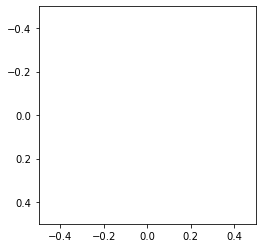

In [40]:
#7598801_1951-02-07_1940
image = cv2.imread('7598801_1951-02-07_1940.jpg')
print(image.shape == (47,100,3) or image.shape == (1,1,3)) #1,1,3  ---- 47,100,3 
plt.imshow(image) 
plt.show()